In [76]:
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
import math

np.random.seed(1)

img= plt.imread('mandrill.png')


In [77]:

def gaussian_noise(img, std):
    
    noise = np.random.normal(img, std)
    img_noise = img+noise
    
    return np.clip(img_noise,0,1)


def salt_pepper_noise(img,probs):
    
    img_copy = img.copy()
    row, col = img_copy.shape
    
    
    num_pixsp= math.floor(probs * 0.5* row*col)
    
    #salt noise
    #indices for white-pixel
    coord_salt_x = np.random.randint(0, img.shape[0],num_pixsp)
    coord_salt_y = np.random.randint(0, img.shape[1],num_pixsp)
    print(coord_salt_x)
    print(coord_salt_y)
    
    for i in range(coord_salt_x.size):
        img_copy[coord_salt_x[i],coord_salt_y[i]]=1
        
    #pepper noise   
    #indices for black-pixel
    coord_pepper_x = np.random.randint(0, img.shape[0]-1,num_pixsp)
    coord_pepper_y = np.random.randint(0, img.shape[1]-1,num_pixsp)
    
    for i in range(coord_pepper_x.size):
        img_copy[coord_pepper_x[i],coord_pepper_y[i]]=0
        
    
    return img_copy
    

[267 411 468 374 396 451 361 166 383 345 352  29 276 382 163 314 481 105
   5 424 320   8 499  43 177 308 442  27 274  91   8 401 269 392 153 296
 307 257 392 291  58 197 388 195 426 472 374 266 257 227 472 161  96 226
 350 106 413 372 508 213 133 194 151 455 328 416 478 231 186 500 489 280
 448 427 488 376   9 181 125  83 409 236 370 183 274 301  41 217 165 414
 287  91 496  37 114 136 158 388 362 297 141  15 229 459 199  74   3 305
 135 374 452 353 111 249 477 475 484 501 105 309 461 248 254 301 165 164
  91 437 450 509 254 457  98 294 466 302 489 210 272   1 289 241 143 169
 158 469 446 268  85 223   8 193 269 165 332 270 157 236 227 216  58 415
 207 448 445  94 127 170 283 235 202 496  80 212  56 272  19 232  71 461
  31  50  62 313 233 293 201  81 165 443 225 377 321   9 438 108  19 506
 457 151 209 455 460 113 326 200   3 390 307  54 441 213 188 161 443 505
 193 433  11 252 185 154  10 290  45   1 198 491 271 223  42 454 407 253
 508 374 383 400 188  85  64 156 285  69 434  75 26

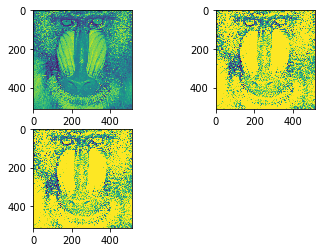

In [80]:

std = np.std(img)

gaussian_img= gaussian_noise(img,std)

gaussian_img*=255
gaussian_img=gaussian_img.astype(np.uint8)
plt.imsave('gaussian_img.png',gaussian_img)

  
salt_pepper_img = salt_pepper_noise(img,0.002)

salt_pepper_img*=255
salt_pepper_img=salt_pepper_img.astype(np.uint8)
plt.imsave('salt_pepper_img.png',salt_pepper_img)


fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(gaussian_img)

ax3=fig.add_subplot(2,2,3)
ax3.imshow(gaussian_img)

